## Анализ базы данных книжного магазина

### Постановка задачи

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

    
### Описание данных
В вашем распоряжении наборы данных:

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

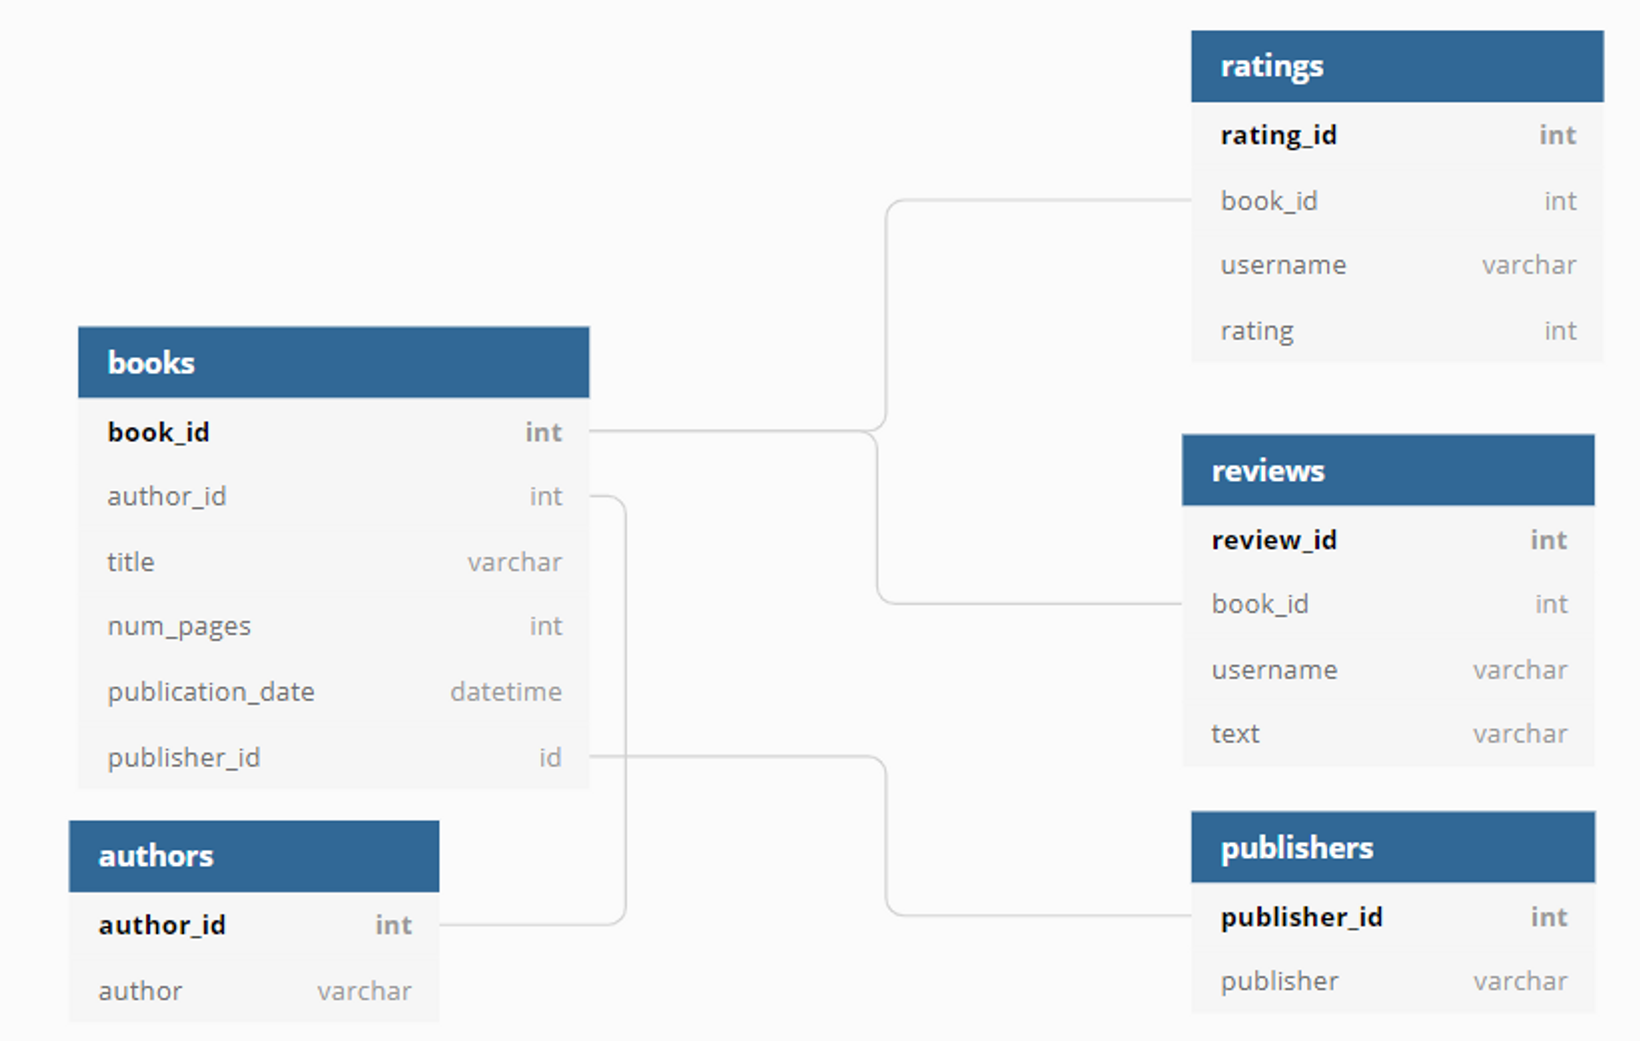


### Цели исследования:


Компания купила крупный сервис для чтения книг по подписке.

Необходимо проанализировать имеющуюся базу данных. В которой находится вся имеющаяся информация о книгах, издательствах, авторах, а также пользовательские обзоры книг.В конце исследования предоставить данные которые помогут сформулировать ценностное предложение для новых продуктов сервиса.

### Основные этапы работы**
1. Подключится к Базе Данных, 
2. Изучение данных
3. Построение запросов и изучение результатов
4. Сделать выводы, рекомендации 

## Подключение к базе данных

In [ ]:
# импортируем библиотеки
import sys
import pandas as pd
from sqlalchemy import create_engine
import missingno as msno
import os
from dotenv import load_dotenv,find_dotenv 

: 

In [ ]:
load_dotenv(find_dotenv())

# Конфигурация БД
user = os.getenv('USER')
password = os.getenv('PWD')
host = os.getenv('HOST')
port = os.getenv('PORT')
db = os.getenv('DB')

: 

In [3]:
# Формируем строку соединения с БД.
conn_str = ("postgresql://{}:{}@{}:{}/{}"\
            .format(user, password, host,port,db))

In [4]:
# Подключение к БД доверяем функции
def get_connection():
    return create_engine(conn_str)

In [5]:
# Вилка событий при подключении к БД
try:
    conn = get_connection()
    print(f'Connection to the {host} for user {port} created successfully')
except Exception as ex:
    print('Error: ', ex)
    sys.exit(2)

Connection to the rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net for user 6432 created successfully


## Изучение данных

### **Таблица `books`**

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

In [6]:
# Формируем запрос к базе
query = '''
        SELECT * 
        FROM books
        '''

Считать всю таблицу

In [7]:
def get_basic_data_table(query, con, index_col=None):
    """Выводит на экран основную информацию о таблице, а именно
        - первые 5 строк выборки из таблицы
        - информация о таблице, типы дынных в ней
        - визуализация пропущенных значений в таблице

    Args:
        query (str): строка, которая описывает запрашиваемую информацию в базе данных 
        con (sqlalchemy.Engine): подключаемое соединение SQLAlchemy, str или sqlite3.
        SQLAlchemy позволяет использовать любую базу данных, поддерживаемую этой библиотекой.
    """
    data_raw = pd.read_sql_query(query, con=conn, index_col=index_col)
    
    display(data_raw.head())
    data_raw.info()
    msno.matrix(data_raw)
    
    
    

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


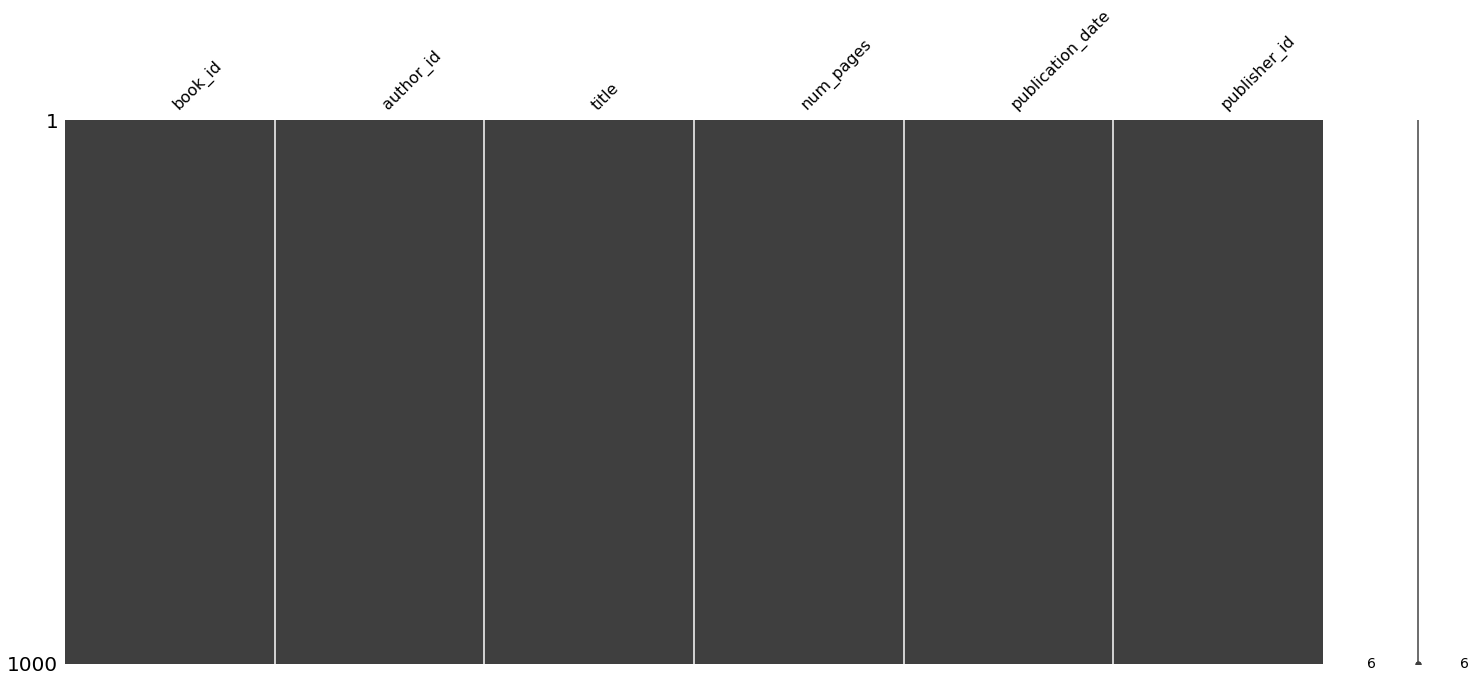

In [8]:
get_basic_data_table(query, con=conn)

Таблица `books` хранит данные о книгах. 

- `book_id` — Уникальный ключ для таблицы `books`, по которому идентифицируем книгу
- `author_id` — хранит ключи ссылающиеся на таблицу `authors`, по которому определим автора
- `publisher_id` - хранит ключи ссылающиеся на таблицу `publishers`, по которому определим издательство, которе издало эту книгу

В таблице присутствуют 6 атрибутов и 1000 записей содержащие данные о книгах, 3 атрибута числовых, Названия книг и даты возвращаются в объектных типах. Пропущенных значений нету.

### **Таблица `authors`**

- `author_id` — идентификатор автора;
- `author` — имя автора.


In [9]:
# Формируем запрос к базе
query = '''
        SELECT * 
        FROM authors
        '''

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


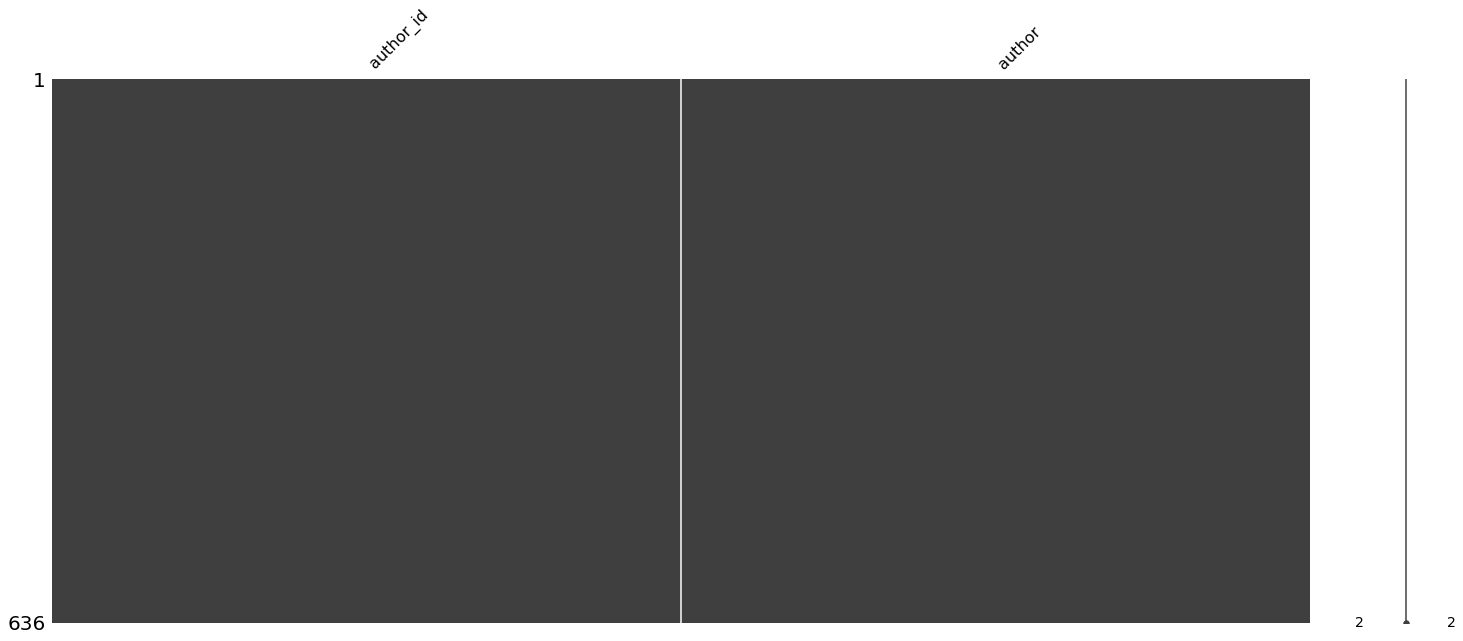

In [10]:
# отправка запроса
get_basic_data_table(query, con=conn)

Присутствует 636 авторов. Колонка `author_id` - хранит уникальные ключи позволяющие идентифицировать авторов книг

### **Таблица `publishers`**

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

In [11]:
# Формируем запрос к базе
query= '''
        SELECT *
        FROM publishers
       '''

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


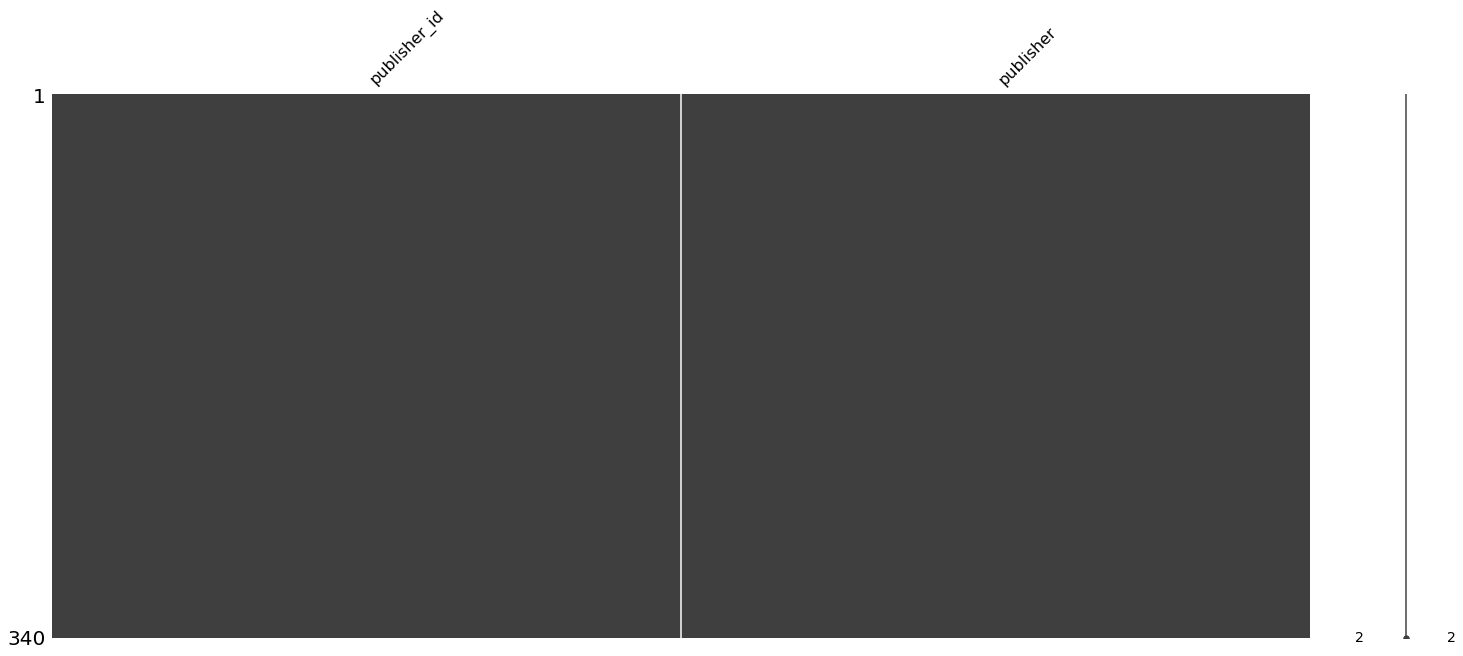

In [12]:
# отправка запроса
get_basic_data_table(query, con=conn)

В таблице присутствуют 340 издательств, Колонка `publisher_id` - хранит уникальные значения для таблицы издательств. Пропусков значений в таблице нету. Типы колонок имеют числовое и object тип соответственно

### **Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.


In [13]:
query = '''
        SELECT *
        FROM ratings
        '''

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


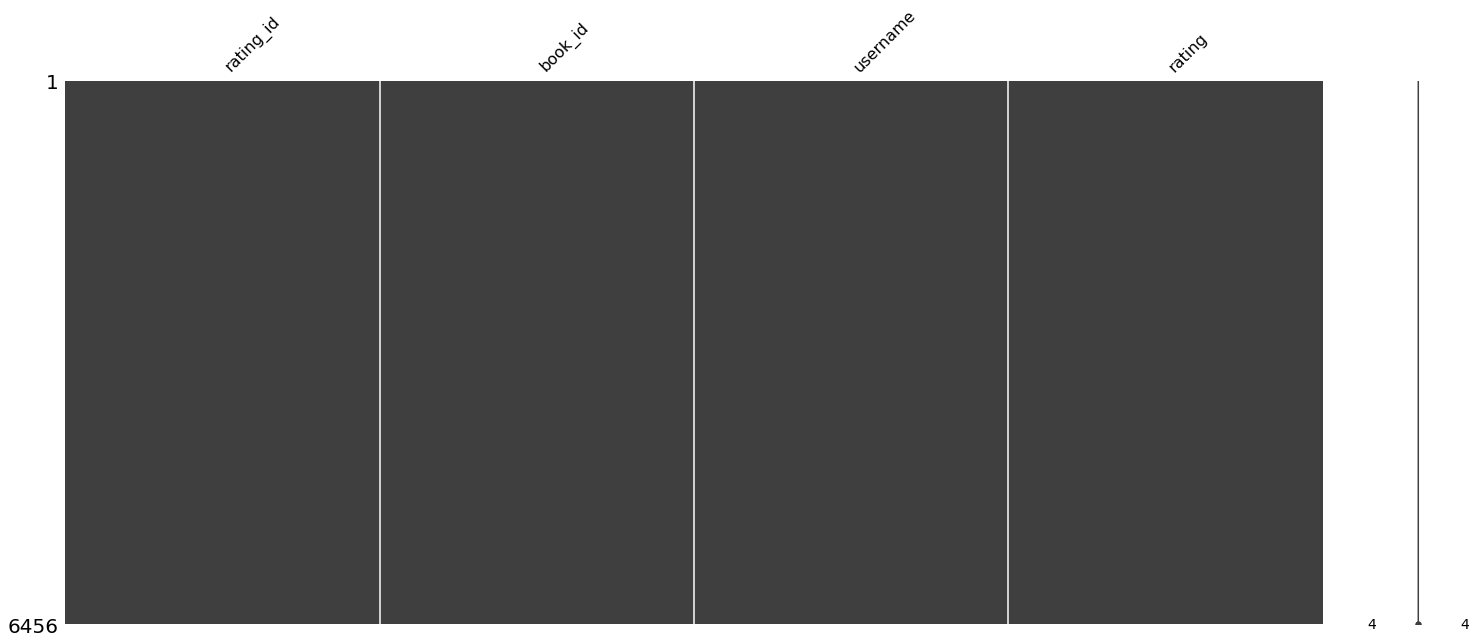

In [14]:
get_basic_data_table(query, conn)

Таблица рейтингов хранит оценки пользователей о книгах в которых была оставлена оценка ими. В таблице 4 атрибута. 
- `rating_id` - хранит уникальные ключи таблицы
- `book_id` - хранит ключи ссылающиеся на ключи в таблице `books`

3 атрибута хранят значения в числовом формате, имена пользователей тип object. Есть 6456 оценок пользователей о книгах. Пропущенных значений нету

### **Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

In [15]:
query = '''
        SELECT *
        FROM reviews
        '''

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


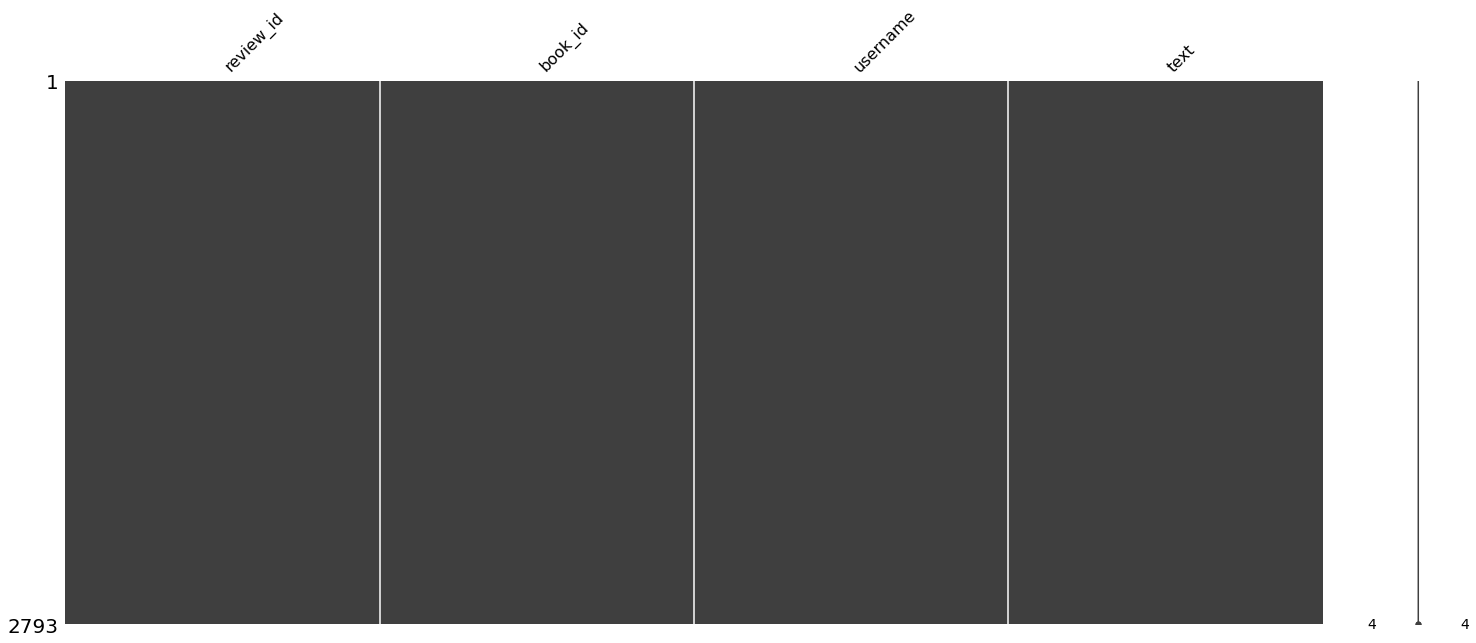

In [16]:
get_basic_data_table(query, conn)

Таблица `reviews` содержит в себе данные о пользователе и его рецензию на книгу. 
- `review_id` = это уникальный ключ дла я этой таблицы, по которому идентифицируется пользователь и его обзор книги
- `book_id` - ссылающейся ключ, по которому идентифицируют книгу, о которой был составлен обзор

В таблице 4 атрибута. Также 2793 записи содержащие обзоры пользователей. 2 атрибута, ключи таблицы, хранятся в числовом типе. Имя пользователя 

### Резюме

Рассмотрел базу дынных хранящую общую информацию книжного магазина
- У таблиц наименования колонок общее, замечаний нету
- Пропущенных значения в колонках не обнаружил
- Разделение информации по таблицам полная, дублирующей информации в таблицах не обнаружено
- При получении данных с запросом содержащим колонку даты необходим будет приводить к типу даты

**Отсутствуют:**
- таблица пользователей - содержащая данные о пользователях
- таблица подписок на чтение книг - по которой можно было узнать на что подписан пользователь
- Возможно есть еще база данных

Предоставленные данные таблиц могут полностью могут ответить на поставленные вопросы

## Построение запросов и изучение результатов

In [17]:
def database_query(qr, conn, explain=False):
    '''
        Функция выводит на экран ответ на запрос к базе данных принимает строку запроса, объект соединения, флаг для вывода информации о времени сборки запроса по молчанию False
    '''
    if explain == True:
        qr = 'EXPLAIN ANALYZE' + qr
        
    response = pd.read_sql_query(qr, conn)
    display(response)
        
    

### Посчитайте, сколько книг вышло после 1 января 2000 года;

In [18]:
q_total_books = '''
SELECT COUNT(*) as total_books
FROM books
WHERE publication_date::date >= '2000-01-01' ;
'''

In [19]:
database_query(q_total_books, conn)

,total_books
0,821


После 1 января вышло 821 книга

### Для каждой книги посчитайте количество обзоров и среднюю оценку;

In [20]:
qr = '''
SELECT b.book_id,
        b.title,
        a.author,
        b.num_pages,
        rb.avg_score,
        rr.num_reviews,
        b.publication_date,
        p.publisher
FROM books b 
LEFT JOIN (
    SELECT book_id,
        AVG(rating) as avg_score
    FROM ratings r
    GROUP BY book_id) AS rb ON b.book_id=rb.book_id
LEFT JOIN (
        SELECT book_id,
            COUNT(username) as num_reviews
        FROM reviews r
        GROUP BY book_id) AS rr ON b.book_id=rr.book_id
INNER JOIN authors AS a ON b.author_id=a.author_id
INNER JOIN publishers AS p ON b.publisher_id=p.publisher_id
    '''

In [21]:
database_query(qr, conn)

,book_id,title,author,num_pages,avg_score,num_reviews,publication_date,publisher
0,652,The Body in the Library (Miss Marple #3),Agatha Christie,191,4.500000,2.0,2006-09-01,Black Dog & Leventhal Publishers
1,273,Galápagos,Kurt Vonnegut Jr.,324,4.500000,2.0,1999-01-12,Dial Press
2,51,A Tree Grows in Brooklyn,Betty Smith,496,4.250000,5.0,2006-05-30,HarperCollins Publishers
3,951,Undaunted Courage: The Pioneering First Missio...,Stephen E. Ambrose,592,4.000000,2.0,2003-10-06,Simon & Schuster
4,839,The Prophet,Kahlil Gibran/جبران خليل جبران/Jihad El,127,4.285714,4.0,2010-01-01,Rupa & Co
...,...,...,...,...,...,...,...,...
995,64,Alice in Wonderland,Lewis Carroll/Jane Carruth/Rene Cloke,92,4.230769,4.0,2004-09-07,Gramercy Books
996,55,A Woman of Substance (Emma Harte Saga #1),Barbara Taylor Bradford,928,5.000000,2.0,2005-12-01,Griffin
997,148,Christine,Stephen King/Marie Milpois,411,3.428571,3.0,2001-06-13,LGF
998,790,The Magicians' Guild (Black Magician Trilogy #1),Trudi Canavan,467,3.500000,2.0,2004-01-31,Orbit


In [22]:
# Решение задачи №2
qr = '''
/*Таблица содержит среднюю оценку*/
    WITH rating_books AS(
SELECT DISTINCT book_id,
	AVG(rating)  OVER(PARTITiON BY book_id) as avg_score
FROM ratings r 
),
/*Таблица с количеством обзоров книг*/
rating_reviews AS(
SELECT DISTINCT book_id,
	COUNT(text) OVER(PARTITION BY book_id) as num_reviews
FROM reviews r 
)
SELECT b.book_id,
        b.title,
        a.author,
        b.num_pages,
        ROUND(rb.avg_score, 2) as avg_score,
        rr.num_reviews,
        b.publication_date,
        p.publisher
FROM books b 
LEFT JOIN rating_books AS rb ON b.book_id=rb.book_id
LEFT JOIN rating_reviews AS rr ON b.book_id=rr.book_id
INNER JOIN authors AS a ON b.author_id=a.author_id
INNER JOIN publishers AS p ON b.publisher_id=p.publisher_id
    '''

In [23]:
database_query(qr, conn)

,book_id,title,author,num_pages,avg_score,num_reviews,publication_date,publisher
0,716,The Epic of Gilgamesh,Anonymous/N.K. Sandars,120,3.00,2.0,2006-05-04,Penguin Books Limited
1,163,Corelli's Mandolin,Louis de Bernières,437,3.00,3.0,1995-08-29,Vintage
2,583,Something Blue (Darcy & Rachel #2),Emily Giffin,338,4.14,4.0,2006-03-21,Griffin
3,448,Morrigan's Cross (Circle Trilogy #1),Nora Roberts,321,4.50,2.0,2006-08-29,Jove
4,499,Pandora's Star,Peter F. Hamilton,768,3.00,2.0,2005-03-02,Del Rey
...,...,...,...,...,...,...,...,...
995,672,The Cat in the Hat and Other Dr. Seuss Favorites,Dr. Seuss/Various,61,5.00,NaN,2003-10-14,Listening Library (Audio)
996,83,Anne Rice's The Vampire Lestat: A Graphic Novel,Faye Perozich/Anne Rice/John Bolton/Daerick Gröss,404,3.67,NaN,1991-11-30,Ballantine Books
997,221,Essential Tales and Poems,Edgar Allan Poe/Benjamin F. Fisher,688,4.00,NaN,2004-10-25,Barnes Noble Classics
998,387,Leonardo's Notebooks,Leonardo da Vinci/H. Anna Suh,352,4.00,NaN,2005-08-01,Black Dog & Leventhal


В магазине все книги оценены в магазине.

### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;


In [24]:
# Решение с оконной функцией
q_lider_publisher_over = '''
SELECT DISTINCT p.publisher,
	COUNT(b.book_id) OVER (PARTITION BY p.publisher ) AS cnt_books
FROM books AS b
JOIN publishers p ON b.publisher_id=p.publisher_id 
WHERE b.num_pages > 50
ORDER BY 2 DESC
LIMIT 5;         
'''

In [25]:
database_query(q_lider_publisher_over, conn)

,publisher,cnt_books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Bantam,19


In [26]:
# Решение с помощью группировки
q_lider_publisher = '''
SELECT p.publisher,
	COUNT(b.book_id) AS cnt_publisher
FROM books b 
JOIN publishers p ON b.publisher_id=p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher 
ORDER BY 2 DESC
LIMIT 5;
'''

In [27]:
database_query(q_lider_publisher, conn)

,publisher,cnt_publisher
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Bantam,19


### Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;


In [28]:
# группировка по id книги и id автора
qr= '''
SELECT author_rating.author, 
ROUND(AVG(author_rating.avg_rating), 2) AS avg_rating_authors
FROM (
    SELECT a.author AS author, 
        AVG(rt.rating) AS avg_rating 
    FROM books AS b 
    LEFT JOIN authors AS a ON b.author_id = a.author_id 
    LEFT JOIN ratings AS rt  ON b.book_id = rt.book_id 
    GROUP BY b.book_id,  a.author_id 
    HAVING COUNT(rt.rating_id) >=50 ) AS author_rating 
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5; 
    '''

In [29]:
database_query(qr,conn)

,author,avg_rating_authors
0,J.K. Rowling/Mary GrandPré,4.28
1,Markus Zusak/Cao Xuân Việt Khương,4.26
2,J.R.R. Tolkien,4.26
3,Louisa May Alcott,4.19
4,Rick Riordan,4.08


### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

In [30]:
# решение с помощью 2 временных таблиц
qr_avg_num_review_users = '''
/*В таблице подсчитываются пользователи оставившие больше 50 оценок*/
WITH best_users_by_rating AS(
SELECT username
FROM ratings r 
GROUP BY username 
HAVING COUNT(rating)>=50
),
/*В таблице подсчитывается количество обзоров у лучших пользователей первой вр-й таблицы*/
rating_reviewer AS (
SELECT DISTINCT bs.username,
    COUNT(rv.text) OVER(PARTITION BY bs.username) AS num_reviews
FROM best_users_by_rating  bs
JOIN reviews rv ON bs.username=rv.username
ORDER BY num_reviews DESC
)
SELECT 
    ROUND(AVG(num_reviews), 2) AS avg_num_review
FROM rating_reviewer 
    '''

In [31]:
database_query(qr_avg_num_review_users, conn)

,avg_num_review
0,24.22


In [32]:
qr_avg_num_review_users = '''
/*Таблица формируют рейтинг пользователей оставивших больше 50 оценок*/
WITH
rating_users_by_reviews AS (
SELECT DISTINCT username,
    COUNT(text) OVER(PARTITION BY username) AS num_reviews
FROM reviews
WHERE username IN (
    SELECT username
    FROM ratings r 
    GROUP BY username 
    HAVING COUNT(rating)>=50
    )
)
SELECT ROUND(AVG(num_reviews), 2)
FROM rating_users_by_reviews
'''

In [33]:
database_query(qr_avg_num_review_users, conn)

,round
0,24.22


## Поиск таблиц в Базе Данных

In [34]:
qr_info = '''
SELECT schemaname,
       C.relname AS "relation",
       pg_size_pretty (pg_relation_size(C.oid)) as table,
       pg_size_pretty (pg_total_relation_size (C.oid)-pg_relation_size(C.oid)) as index,
       pg_size_pretty (pg_total_relation_size (C.oid)) as table_index,
       n_live_tup
FROM pg_class C
LEFT JOIN pg_namespace N ON (N.oid = C .relnamespace)
LEFT JOIN pg_stat_user_tables A ON C.relname = A.relname
WHERE nspname NOT IN ('pg_catalog', 'information_schema')
AND C.relkind <> 'i'
AND nspname !~ '^pg_toast'
ORDER BY pg_total_relation_size (C.oid) DESC
'''

In [35]:
database_query(qr_info, conn)

,schemaname,relation,table,index,table_index,n_live_tup
0,public,visits,30 MB,7912 kB,38 MB,0.0
1,public,orders,3776 kB,1144 kB,4920 kB,0.0
2,public,ratings,344 kB,192 kB,536 kB,0.0
3,public,reviews,400 kB,112 kB,512 kB,0.0
4,public,advertisment_costs,136 kB,96 kB,232 kB,0.0
5,public,books,88 kB,72 kB,160 kB,0.0
6,public,author,48 kB,64 kB,112 kB,0.0
7,public,second_b,88 kB,24 kB,112 kB,0.0
8,public,authors,40 kB,64 kB,104 kB,0.0
9,public,publishers,24 kB,48 kB,72 kB,0.0


Есть еще 3 таблицы `advertisment_costs`, `orders`, `visits` в базе данных

In [36]:
query = '''
SELECT *
FROM visits
'''

,id,uid,device,endts,sourceid,startts
0,0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00
1,1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00
2,2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00
3,3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00
4,4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358532 entries, 0 to 358531
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        358532 non-null  int64         
 1   uid       358532 non-null  object        
 2   device    358532 non-null  object        
 3   endts     358532 non-null  datetime64[ns]
 4   sourceid  358532 non-null  int64         
 5   startts   358532 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 16.4+ MB


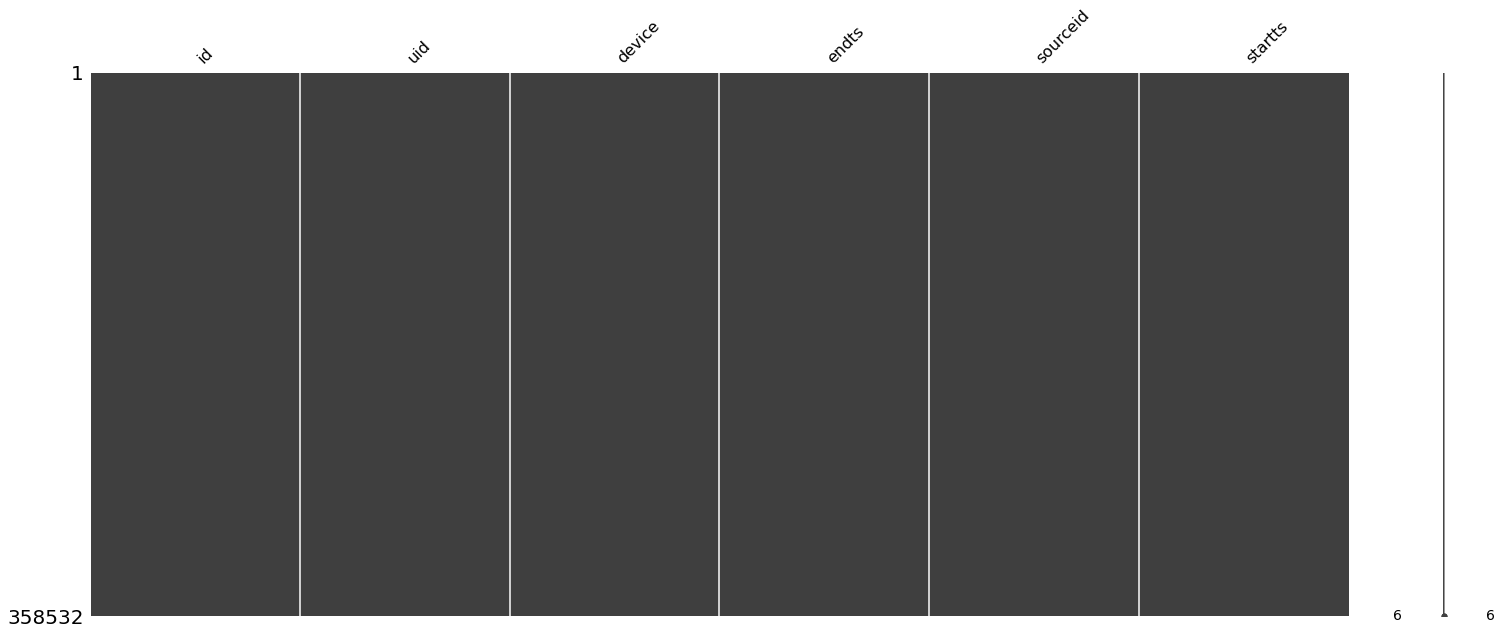

In [37]:
get_basic_data_table(query, conn)

В таблице с данными посещений магазина пользователями, 2 атрибута с временным типом объекта - приведение типов не потребуется, 2 числовых и 2 атрибута с типом object

In [38]:
visits_17_year = '''
SELECT *
FROM visits
WHERE EXTRACT(YEAR FROM endts::date) = 2017
'''

In [39]:
database_query(visits_17_year, conn)

,id,uid,device,endts,sourceid,startts
0,0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00
1,2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00
2,4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00
3,5,16007536194108375387,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00
4,7,11423865690854540312,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00
...,...,...,...,...,...,...
195912,8148,8895470949732960686,desktop,2017-12-11 11:00:00,4,2017-12-11 10:25:00
195913,8149,2163819817630479548,desktop,2017-11-23 11:00:00,3,2017-11-23 10:59:00
195914,8152,1826046490981119611,desktop,2017-10-21 20:37:00,2,2017-10-21 20:35:00
195915,8153,6936960720731405870,desktop,2017-09-08 10:04:00,2,2017-09-08 09:52:00


Половина всех визитов произошла в 2017 году

In [40]:
qr_time = '''SELECT 
MIN(endts::date) start_write_data,
MAX(endts::date) end_write_data
FROM visits v'''
database_query(qr_time, conn)

,start_write_data,end_write_data
0,2017-06-01,2018-06-01


В базе данных устаревшая информация, за 2017-2018 год

In [41]:
# Подсчет удержания в июне 2017 года, первая половина месяца
qt_retention_rate = '''
WITH sessions AS (
/* Таблица сессий пользователей, Каждому пользователю проставить нумерацию строк от даты прихода в приложение*/
SELECT uid,
	startts::date AS date,
	ROW_NUMBER()  OVER (PARTITION BY uid ORDER BY startts::date) AS rn
FROM visits v
WHERE device = 'desktop' AND startts::date BETWEEN '2017-06-01' AND '2017-06-14'
GROUP BY uid, startts::date
),
/*Оставляем пользователям строки когда первый раз они зашли в магазин*/
first_time_users AS (
SELECT *
FROM sessions
WHERE rn=1
),
/*Таблица пользователей*/
profiles AS (
SELECT uid,
	date, 
	COUNT(*) OVER(PARTITION BY date) AS cohort_users_cnt
FROM first_time_users
)
/*Когортный анализ*/
SELECT p.date AS cohort_date,
	s.date AS sesion_date,
	COUNT(p.uid) AS users_cnt,
	cohort_users_cnt,
	ROUND(COUNT(p.uid) * 100.0/ cohort_users_cnt, 2) AS retention_rate
FROM profiles AS p
JOIN sessions AS s ON p.uid=s.uid
GROUP BY 1, 2, 4
ORDER BY 1, 2
'''

In [42]:
res= pd.read_sql_query(qt_retention_rate, conn)
res.head(20)

,cohort_date,sesion_date,users_cnt,cohort_users_cnt,retention_rate
0,2017-06-01,2017-06-01,455,455,100.00
1,2017-06-01,2017-06-02,41,455,9.01
2,2017-06-01,2017-06-03,17,455,3.74
3,2017-06-01,2017-06-04,10,455,2.20
4,2017-06-01,2017-06-05,29,455,6.37
5,2017-06-01,2017-06-06,19,455,4.18
6,2017-06-01,2017-06-07,18,455,3.96
7,2017-06-01,2017-06-08,23,455,5.05
8,2017-06-01,2017-06-09,17,455,3.74
9,2017-06-01,2017-06-10,9,455,1.98


На второй день лайфтайма пользователи `desktop` показывают плохие результаты, потери составляют более 90%

## Выводы

Предоставили устаревшую базу данных, по таким данным сложно будет дать рекомендации для сегодняшнего дня